## Introduction

In this exercise, you will be using support vector machines (SVMs) to build a classifier of activity classification. To get started with the exercise, you will need to download the activity.csv to the directory where you wish to complete the exercise.

Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories.

In SVMs, our main objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum margin hyperplane in the following 2 step process –

1. Generate hyperplanes which segregates the classes in the best possible way. There are many hyperplanes that might classify the data. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.

2. So, we choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the maximum margin hyperplane and the linear classifier it defines is known as a maximum margin classifier.

The following diagram illustrates the concept of maximum margin hyperplane in a clear manner.

<img src="Maximum_margin.png" width="600" align="center">

Sometimes, it is not possible to separate them using a linear hyperplane. In such a situation, SVMs uses a kernel trick to transform the input space to a higher dimensional space as shown in the diagram below. It uses a mapping function to transform the 2-D input space into the 3-D input space. Now, we can easily segregate the data points using linear separation.

<img src="Kernel_trick.png" width="600" align="center">

### Kernel function

1. Linear kernel: In linear kernel, the kernel function takes the form of a linear function as follows:

$$\text{linear kernel} : K(x^{(i)} , x^{(j)} ) = x^{(i)^T} x^{(j)}$$

Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. 

2. Polynomial Kernel: Polynomial kernel represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables.

$$\text{linear kernel} : K(x^{(i)} , x^{(j)} ) = (x^{(i)^T} x^{(j)} + c)^r\qquad\text{where } c \geq 0$$

3. Radial Basis Function Kernel: Radial basis function kernel is a general purpose kernel. It is used when we have no prior knowledge about the data. 

$$\text{linear kernel} : K(x^{(i)} , x^{(j)} ) = \exp\left[-\frac{\|x^{(i)} - x^{(j)} \|}{2\sigma^2}\right] $$

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:
from google.colab import files
uploaded = files.upload()



Saving Kritsana NETPUGDEE - activity.csv to Kritsana NETPUGDEE - activity (1).csv


In [39]:
df = pd.read_csv('Kritsana NETPUGDEE - activity.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [40]:
df.shape

(2947, 563)

In [41]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

## <font color='red'>Practice</font>

Checking whether there is any null values on each input feature.

In [42]:
# write your code here
# ====================
pd.isnull(df).sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

## <font color='red'>Practice</font>

Count the number of each activity type.

In [43]:
# write your code here
# ====================
df['Activity'].value_counts()


LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

In [44]:
# Seperating Predictors and Outcome values from train and test sets
X = pd.DataFrame(df.drop(['Activity','subject'],axis=1))
y_label = df.Activity.values.astype(object)

In [45]:
# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# Encoding data labels 
encoder.fit(y_label)
y = encoder.transform(y_label)

## <font color='red'>Practice</font>

Normalize the input feature X using **StandardScaler**.

In [46]:
# write your code here
# ====================
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)

X_scaled

array([[-0.2777081 , -0.21063123,  2.19307573, ..., -0.40479042,
         0.62272321, -0.0383485 ],
       [ 0.19865964,  0.18259066, -0.25026383, ..., -0.36173867,
         0.63673075, -0.14570918],
       [ 0.02458676, -0.31805537, -0.22848456, ..., -0.37093228,
         0.63284514, -0.12685534],
       ...,
       [ 1.25445818,  1.86244113, -0.17318039, ..., -0.27780151,
         0.61556116,  0.95227139],
       [-0.60108793,  1.41138509,  0.27812868, ..., -0.28636876,
         0.58565426,  0.97869501],
       [-1.98758645, -0.02226443, -0.66991444, ..., -0.28707909,
         0.58304691,  0.98093374]])

In [47]:
# Dimension of input features and target label 
print("Dimension of X",X_scaled.shape)
print("Dimension of y",y.shape)

Dimension of X (2947, 561)
Dimension of y (2947,)


## <font color='red'>Practice</font>

Split the data into training and testing dataset with 70:30 ration and random_state=5.

In [48]:
# write your code here
# ====================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.3, random_state=5)

In [50]:
# Dimension of Train and Test set 
print("Dimension of X-Train set",X_train.shape)
print("Dimension of X-Test set",X_test.shape)
print("Dimension of y-Train set",y_train.shape)
print("Dimension of y-Test set",y_test.shape)

Dimension of X-Train set (2062, 561)
Dimension of X-Test set (885, 561)
Dimension of y-Train set (2062,)
Dimension of y-Test set (885,)


In [51]:
# Running SVM with default hyperparameter
from sklearn.svm import SVC

svc = SVC() #Default hyperparameters
svc.fit(X_train,y_train)

SVC()

In [52]:
from sklearn import metrics

y_pred = svc.predict(X_test)
print('Accuracy Score: %0.4f' %(metrics.accuracy_score(y_test,y_pred)))

Accuracy Score: 0.9819


## <font color='red'>Practice</font>

Create SVC-linear with default hyperparameter and also evaluate the accuracy score on testing dataset.

In [59]:
# write your code here
# ====================
lsvc = SVC(kernel='linear')
lsvc.fit(X_train,y_train)
y_predl = lsvc.predict(X_test)
print('Accuracy Score: %0.4f' %(metrics.accuracy_score(y_test,y_predl)))

Accuracy Score: 0.9785


Accuracy Score: 0.9785


## <font color='red'>Practice</font>

Create SVC-RBF kernel with default hyperparameter and also evaluate the accuracy score on testing dataset.

In [60]:
# write your code here
# ====================
svcr = SVC(kernel='rbf')
svcr.fit(X_train,y_train)
y_pred2 = svcr.predict(X_test)
print('Accuracy Score: %0.4f' %(metrics.accuracy_score(y_test,y_pred2)))

Accuracy Score: 0.9819


Accuracy Score: 0.9819


## <font color='red'>Practice</font>

Create SVC-Polynomial kernel with default hyperparameter and also evaluate the accuracy score on testing dataset.

In [61]:
# write your code here
# ====================
svcpo = SVC(kernel='poly')
svcpo.fit(X_train,y_train)
y_pred3 = svcpo.predict(X_test)
print('Accuracy Score: %0.4f' %(metrics.accuracy_score(y_test,y_pred3)))


Accuracy Score: 0.9593


Accuracy Score: 0.9593


In [62]:
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1, 1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
               {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


In [63]:
# Performing CV to tune parameters for best SVM fit
from sklearn.model_selection import GridSearchCV

svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [64]:
# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
print('Best score for training data: %0.4f\n' %(svm_model.best_score_))

final_model = svm_model.best_estimator_
y_pred = final_model.predict(X_test)
print('Accuracy Score for testing data: %0.4f' %(metrics.accuracy_score(y_test,y_pred)))

Best C: 10 

Best Kernel: rbf 

Best Gamma: 0.001 

Best score for training data: 0.9821

Accuracy Score for testing data: 0.9853


In [65]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[157   0   0   0   0   0]
 [  1 144   5   0   0   0]
 [  0   7 152   0   0   0]
 [  0   0   0 156   0   0]
 [  0   0   0   0 121   0]
 [  0   0   0   0   0 142]]


In [66]:
from sklearn.metrics import classification_report

Y_test_label = list(encoder.inverse_transform(y_test))
Y_pred_label = list(encoder.inverse_transform(y_pred))
print(classification_report(Y_test_label,Y_pred_label))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       157
           SITTING       0.95      0.96      0.96       150
          STANDING       0.97      0.96      0.96       159
           WALKING       1.00      1.00      1.00       156
WALKING_DOWNSTAIRS       1.00      1.00      1.00       121
  WALKING_UPSTAIRS       1.00      1.00      1.00       142

          accuracy                           0.99       885
         macro avg       0.99      0.99      0.99       885
      weighted avg       0.99      0.99      0.99       885



## Support Vector Regression

Here, we will build several models for predicting the future stock price. You will work with historical data about the stock prices of a publicly listed company in the Stock Exchange of Thailand (SET). 

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web #pip install pandas-datareader
%matplotlib inline

In [21]:
#Get the stock quote: 'PTT.BK'-PTT Thailand
df = web.DataReader('PTT.BK', data_source='yahoo', start='2019-01-01', end='2020-07-31')
df.to_csv("PTTBK.csv")
#Show the data
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,46.75,46.25,46.25,46.25,30481900.0,39.879620
2019-01-03,47.00,45.25,46.50,45.50,53438400.0,39.232918
2019-01-04,47.00,45.25,45.50,46.75,60708300.0,40.310749
2019-01-07,48.75,47.25,47.25,48.00,86356300.0,41.388580
2019-01-08,48.75,47.75,48.25,48.00,50671500.0,41.388580


In [3]:
df.shape

(387, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 2019-01-02 to 2020-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       387 non-null    float64
 1   Low        387 non-null    float64
 2   Open       387 non-null    float64
 3   Close      387 non-null    float64
 4   Volume     387 non-null    float64
 5   Adj Close  387 non-null    float64
dtypes: float64(6)
memory usage: 21.2 KB


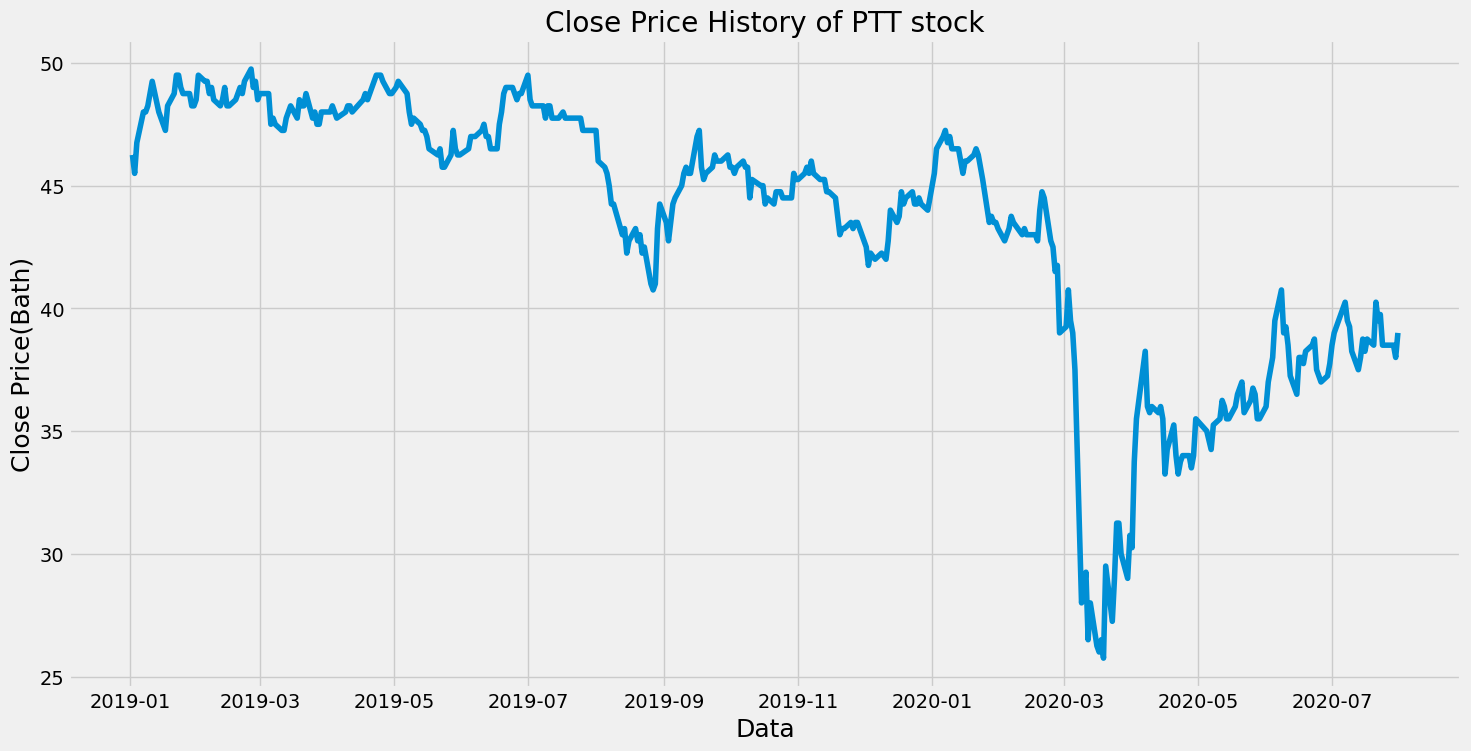

In [5]:
#Visualize the closing price history
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.title('Close Price History of PTT stock')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price(Bath)', fontsize=18)
plt.show()

In [6]:
#convert date column to type datetime64 
df['Date'] = pd.to_datetime(df.index)

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

#return only closing price values
closing_price = df['Close'].values

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,Date,Year,Month,Day
Date,,,,,,,,,,
2019-01-02,46.75,46.25,46.25,46.25,30481900.0,39.879627,2019-01-02,2019,1,2
2019-01-03,47.00,45.25,46.50,45.50,53438400.0,39.232918,2019-01-03,2019,1,3
2019-01-04,47.00,45.25,45.50,46.75,60708300.0,40.310749,2019-01-04,2019,1,4
2019-01-07,48.75,47.25,47.25,48.00,86356300.0,41.388577,2019-01-07,2019,1,7
2019-01-08,48.75,47.75,48.25,48.00,50671500.0,41.388577,2019-01-08,2019,1,8


In [8]:
df_stock = pd.DataFrame(df['Close'])
df_stock.head()

,Close
Date,
2019-01-02,46.25
2019-01-03,45.50
2019-01-04,46.75
2019-01-07,48.00
2019-01-08,48.00


In [9]:
# Create a variable to predict future values
future_day = 1
# Create a new column (target) shifted 'x' units/days up
df_stock['Prediction'] = df[['Close']].shift(-future_day)
df_stock.tail()

,Close,Prediction
Date,,
2020-07-23,39.75,38.5
2020-07-24,38.50,38.5
2020-07-29,38.50,38.0
2020-07-30,38.00,39.0
2020-07-31,39.00,NaN


In [10]:
df_stock.shape

(387, 2)

In [11]:
# Create a feature dataset X and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df_stock.drop(['Prediction'], 1))[:-future_day]

# Create the target data (y) and convert it to a numpy array
y = np.array(df_stock['Prediction'])[:-future_day]

print(X.shape, y.shape)

(386, 1) (386,)


C:\Users\Kritsana Netpugdee\AppData\Local\Temp\ipykernel_76696\2634161823.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df_stock.drop(['Prediction'], 1))[:-future_day]


In [12]:
# Create training and testing data set (30 days)
x_train = X[:-30]
y_train = y[:-30]
x_test = X[-30:]
y_test = y[-30:]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(356, 1) (356,)
(30, 1) (30,)


## <font color='red'>Practice</font>

Create SVR with **'linear', 'poly', and 'rbf'** kernels using default hyperparameters and then make predictions on the testing data.

In [14]:
# write your code here
# ====================
from sklearn.svm import SVR

#create models
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')
svr_rbf = SVR(kernel='rbf')

# Train models
svr_lin.fit(x_train,y_train)
svr_poly.fit(x_train,y_train)
svr_rbf.fit(x_train,y_train)


# Prediction on testing data
y_pred_lin = svr_lin.predict(x_test)
y_pred_poly = svr_poly.predict(x_test)
y_pred_rbf = svr_rbf.predict(x_test)

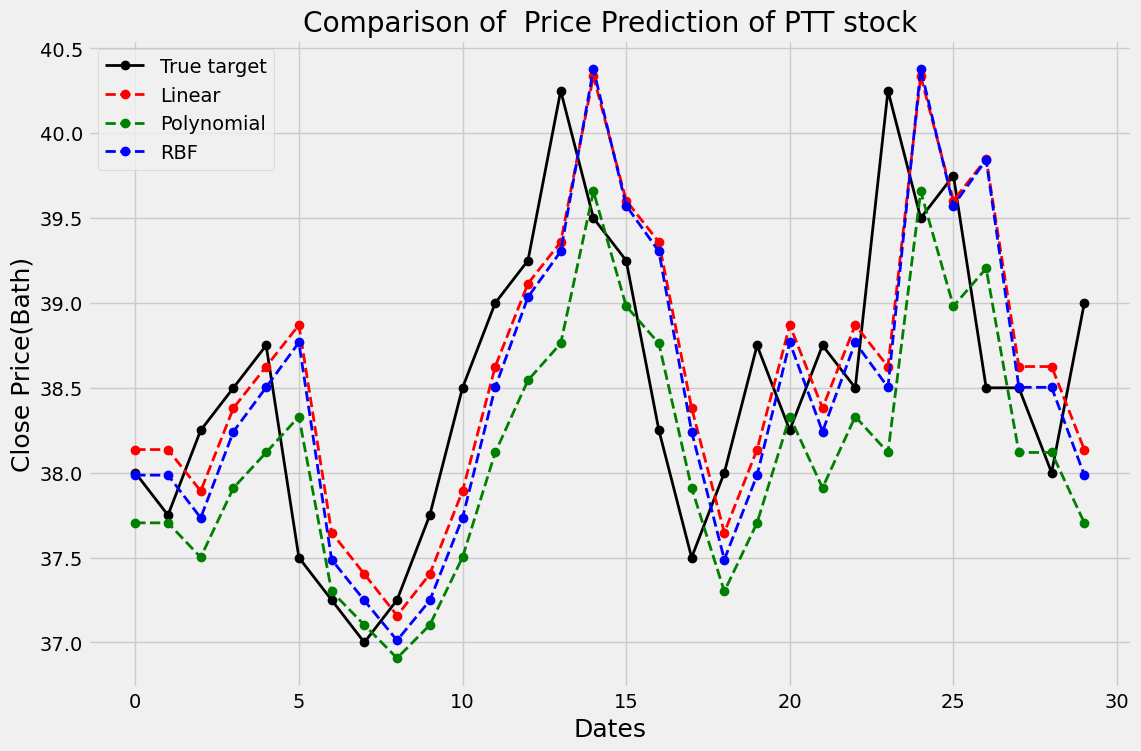

In [15]:
# Plot the prediction of the models on graph
plt.figure(figsize=(12,8))
plt.plot(y_test, color='black', lw = 2, marker='o', label ='True target')
plt.plot(y_pred_lin, '--r', lw = 2, marker='o', label ='Linear')
plt.plot(y_pred_poly, '--g', lw = 2, marker='o', label ='Polynomial')
plt.plot(y_pred_rbf, '--b', lw = 2, marker='o', label ='RBF')
plt.title('Comparison of  Price Prediction of PTT stock')
plt.xlabel('Dates', fontsize=18)
plt.ylabel('Close Price(Bath)', fontsize=18)
plt.legend()
plt.show()

In [16]:
# evaluate performance of the models
from sklearn import metrics

print('MSE of SVR linear: %.4f' %(metrics.mean_squared_error(y_test, y_pred_lin)))
print('MSE of SVR poly: %.4f' %(metrics.mean_squared_error(y_test, y_pred_poly)))
print('MSE of SVR rbf: %.4f' %(metrics.mean_squared_error(y_test, y_pred_rbf)))

MSE of SVR linear: 0.4765
MSE of SVR poly: 0.5820
MSE of SVR rbf: 0.5060


In [17]:
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1, 1e-2, 1e-3, 1e-4],
                'kernel': ['poly'],'degree': [2, 3, 4],
                'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [18]:
# Performing CV to tune parameters for best SVM fit
from sklearn.model_selection import GridSearchCV
start_time = time.time()

svm_model = GridSearchCV(SVR(), params_grid, cv=5)
svm_model.fit(x_train, y_train)

print('Time elapse: %0.2f sec.' %(time.time() - start_time))

Time elapse: 173.47 sec.


In [19]:
# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
print('Best score for training data: %0.4f\n' %(svm_model.best_score_))
final_model = svm_model.best_estimator_
y_pred = final_model.predict(x_test)
print('MSE of best parameters of SVR: %.4f' %(metrics.mean_squared_error(y_test, y_pred)))

Best C: 100 

Best Kernel: linear 

Best Gamma: 1 

Best score for training data: 0.7420

MSE of best parameters of SVR: 0.4765


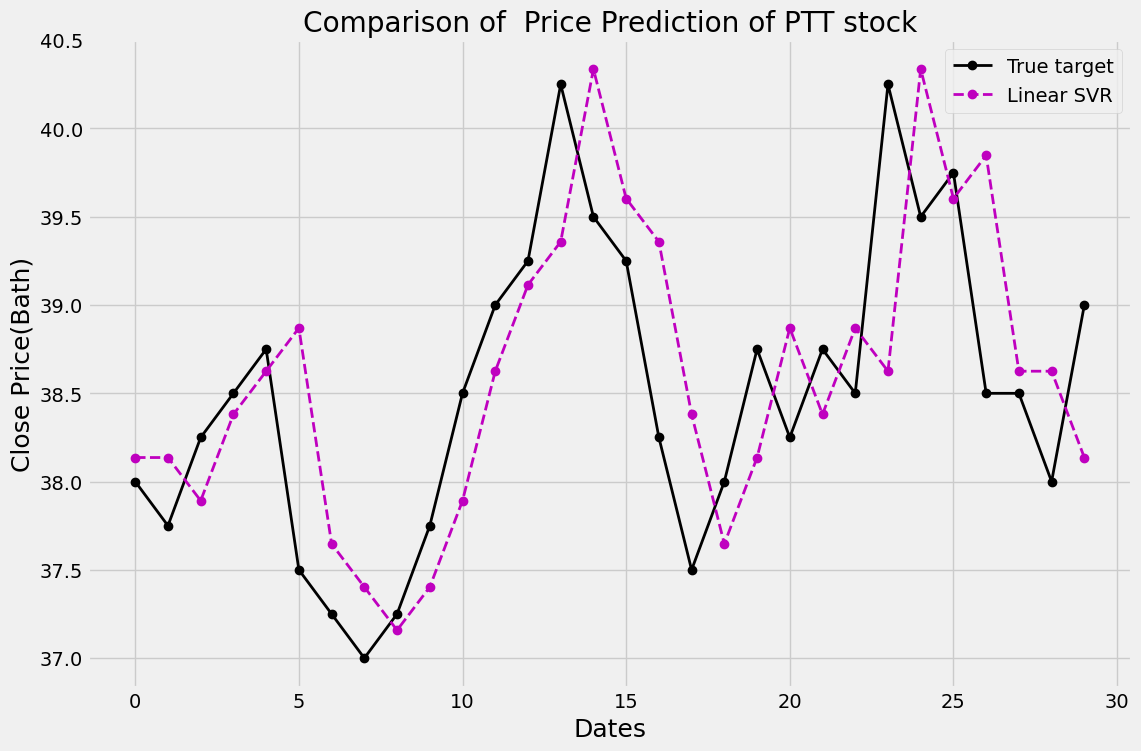

In [20]:
# Plot the prediction of the best parameters of the models on graph
plt.figure(figsize=(12,8))
plt.plot(y_test, '-k', lw = 2, marker='o', label ='True target')
plt.plot(y_pred, '--m', lw = 2, marker='o', label ='Linear SVR')
plt.title('Comparison of  Price Prediction of PTT stock')
plt.xlabel('Dates', fontsize=18)
plt.ylabel('Close Price(Bath)', fontsize=18)
plt.legend()
plt.show()